# Introduction to Data Science - Week 6 
## Classification Walkthroughs

In [1]:
#Data and plotting imports
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

#Machine learning imports
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree

In [2]:
#https://hackernoon.com/how-to-plot-a-decision-boundary-for-machine-learning-algorithms-in-python-3o1n3w07
#A Function to plot decision boundarys
def plot_decision(X,y,model,n_classes=2):
    min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1
    min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1
    x1grid = np.arange(min1, max1, 0.01)
    x2grid = np.arange(min2, max2, 0.1)
    xx, yy = np.meshgrid(x1grid, x2grid)
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
    grid = np.hstack((r1,r2))
    model.fit(X, y)
    yhat = model.predict(grid)
    zz = yhat.reshape(xx.shape)
    plt.contourf(xx, yy, zz, cmap='binary_r')
    for class_value in range(n_classes):
        row_ix = np.where(y == class_value)
        plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='binary_r')

/var/folders/1l/ygt81nk5749f3hs2_wj4msx00000gn/T/ipykernel_45859/882318958.py:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='binary_r')


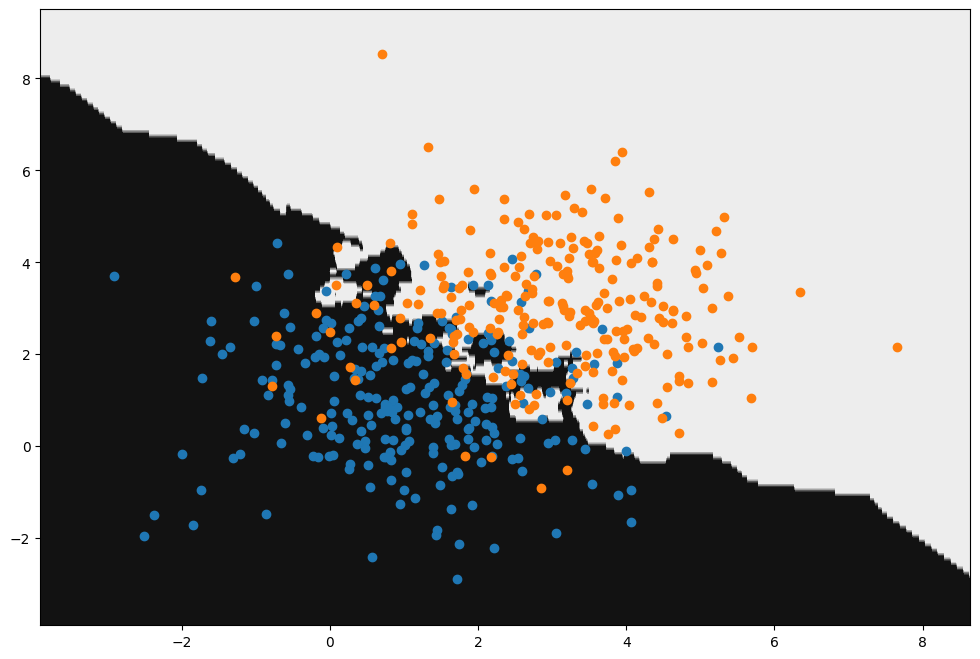

In [3]:
#x and y coordinate for the centre of each class
centres = [
    #x and y for class 1
    [1,1],
    #x and y for class 2
    [3,3]
]
#Controls the variation (deviation from the centre)
standard_deviation = 5
#number of nearest neighbours used for matching 
k = 20
#x and y coordinate for the centre of each class
centres = [
    #x and y for class 1
    [1,1],
    #x and y for class 2
    [3,3]
]
#Controls the variation (deviation from the centre)
standard_deviation = 1.4
#number of nearest neighbours used for matching 
k = 5
#Generate data
x, y = make_blobs(n_samples=500, centers=centres, random_state=1, cluster_std=standard_deviation)
#Plot decision boundary 
plt.figure(figsize=(12,8))
plot_decision(x, y, KNeighborsClassifier(n_neighbors=k), len(centres))

In [4]:
df = pd.read_csv("data/pokedex.csv")
#Drop missing rows
df = df.dropna()
#delete choisen rows
del df["pokedex_number"]
del df["name"]

#Replace hp <50 with 1,hp>50=1
df.loc[(df["hp"]<=50), 'hp'] = 0
df.loc[(df["hp"]>=50), 'hp'] = 1

df.loc[(df["type"]=="water"), 'type'] = 0
df.loc[(df["type"]=="normal"), 'type'] = 1
df.loc[(df["type"]=="grass"), 'type'] = 2
df.loc[(df["type"]=="bug"), 'type'] = 3
df.loc[(df["type"]=="fire"), 'type'] = 4
df.loc[(df["type"]=="psychic"), 'type'] = 5
df.loc[(df["type"]=="rock"), 'type'] = 6
df.loc[(df["type"]=="fighting"), 'type'] = 7
df.loc[(df["type"]=="dark"), 'type'] = 8
df.loc[(df["type"]=="electric") ,'type'] = 9
df.loc[(df["type"]=="poison"), 'type'] = 10
df.loc[(df["type"]=="ghost"), 'type'] = 11
df.loc[(df["type"]=="water"), 'type'] = 12
df.loc[(df["type"]=="fairy"), 'type'] = 13
df.loc[(df["type"]=="dragon"), 'type'] = 14
df.loc[(df["type"]=="ground"), 'type'] = 15
df.loc[(df["type"]=="ice"), 'type'] = 16
df.loc[(df["type"]=="steel"), 'type'] = 17
df.loc[(df["type"]=="flying"), 'type'] = 18

#Sort and get the first 400 hp and last 400 hp (balances classes)
w = df.sort_values("hp")[0:400]
r = df.sort_values("hp")[-400:]
df = pd.concat([w,r])
df.columns

Index(['attack', 'defense', 'height_m', 'hp', 'percentage_male', 'sp_attack',
       'sp_defense', 'speed', 'type', 'weight_kg', 'generation',
       'is_legendary'],
      dtype='object')

In [5]:
df

,attack,defense,height_m,hp,percentage_male,sp_attack,sp_defense,speed,type,weight_kg,generation,is_legendary
0,49,49,0.7,0,88.1,65,65,45,2,6.9,1,0
663,35,40,0.3,0,50.0,27,25,35,3,2.5,6,0
190,30,30,0.3,0,50.0,30,30,30,2,1.8,2,0
660,50,43,0.3,0,50.0,40,38,62,1,1.7,6,0
365,64,85,0.4,0,50.0,74,55,32,0,52.5,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
319,70,35,2.0,1,50.0,70,35,60,0,130.0,3,0
320,90,45,14.5,1,50.0,90,45,60,0,398.0,3,0
321,60,40,0.7,1,50.0,65,45,35,4,24.0,3,0
313,47,75,0.6,1,0.0,73,85,85,3,17.7,3,0


/var/folders/1l/ygt81nk5749f3hs2_wj4msx00000gn/T/ipykernel_45859/882318958.py:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='binary_r')


Accuracy: 85.0


/var/folders/1l/ygt81nk5749f3hs2_wj4msx00000gn/T/ipykernel_45859/882318958.py:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='binary_r')


Accuracy: 81.75


/var/folders/1l/ygt81nk5749f3hs2_wj4msx00000gn/T/ipykernel_45859/882318958.py:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='binary_r')


Accuracy: 76.0


/var/folders/1l/ygt81nk5749f3hs2_wj4msx00000gn/T/ipykernel_45859/882318958.py:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='binary_r')


Accuracy: 81.0


/var/folders/1l/ygt81nk5749f3hs2_wj4msx00000gn/T/ipykernel_45859/882318958.py:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='binary_r')


Accuracy: 76.5


/var/folders/1l/ygt81nk5749f3hs2_wj4msx00000gn/T/ipykernel_45859/882318958.py:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='binary_r')


Accuracy: 76.75


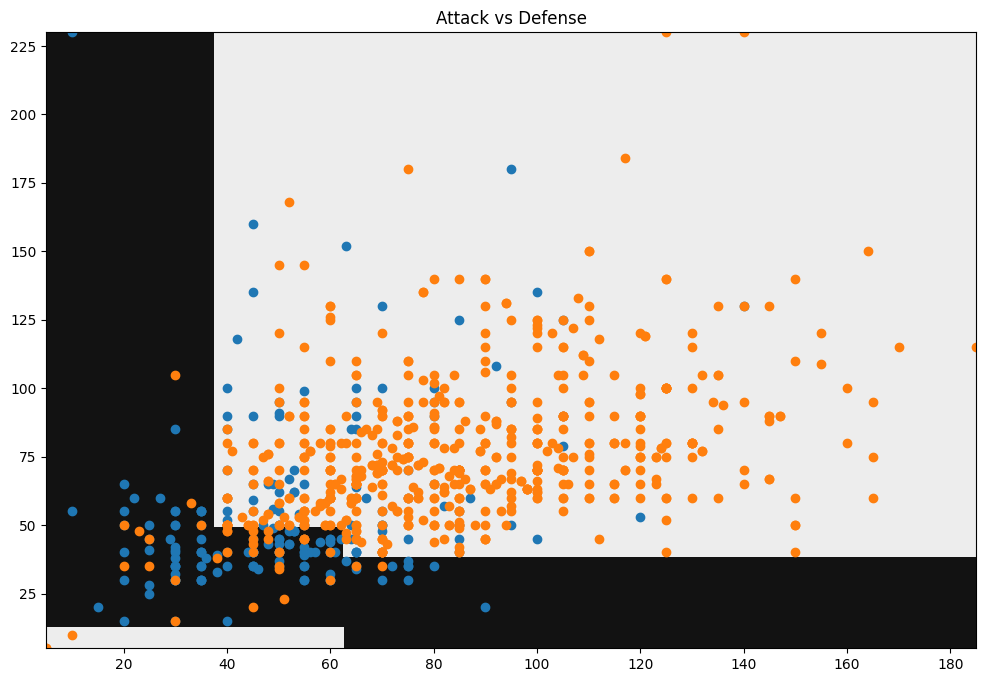

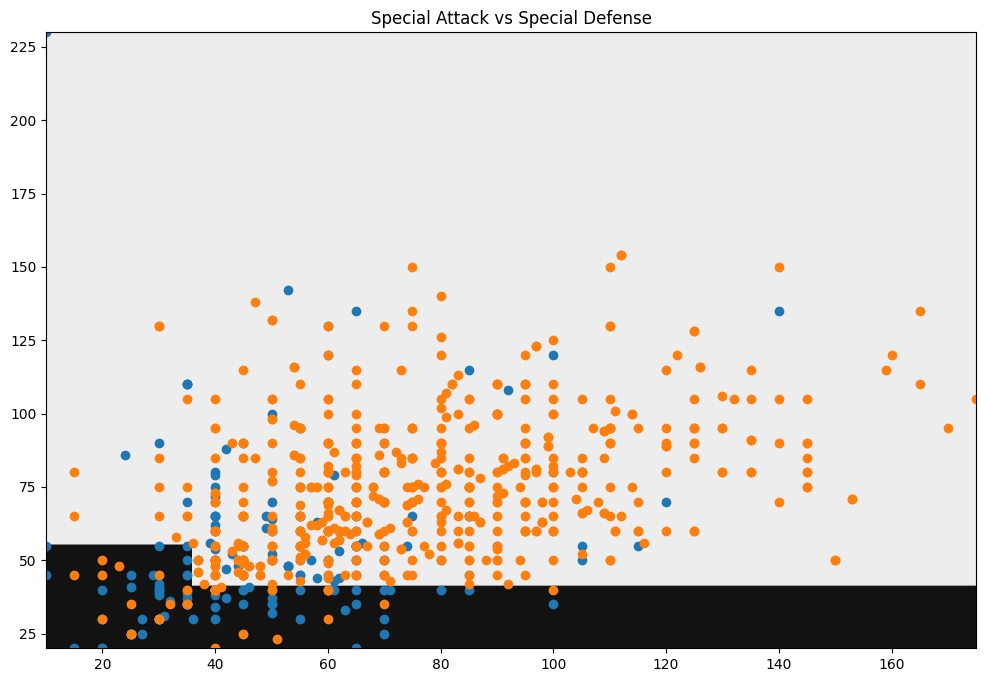

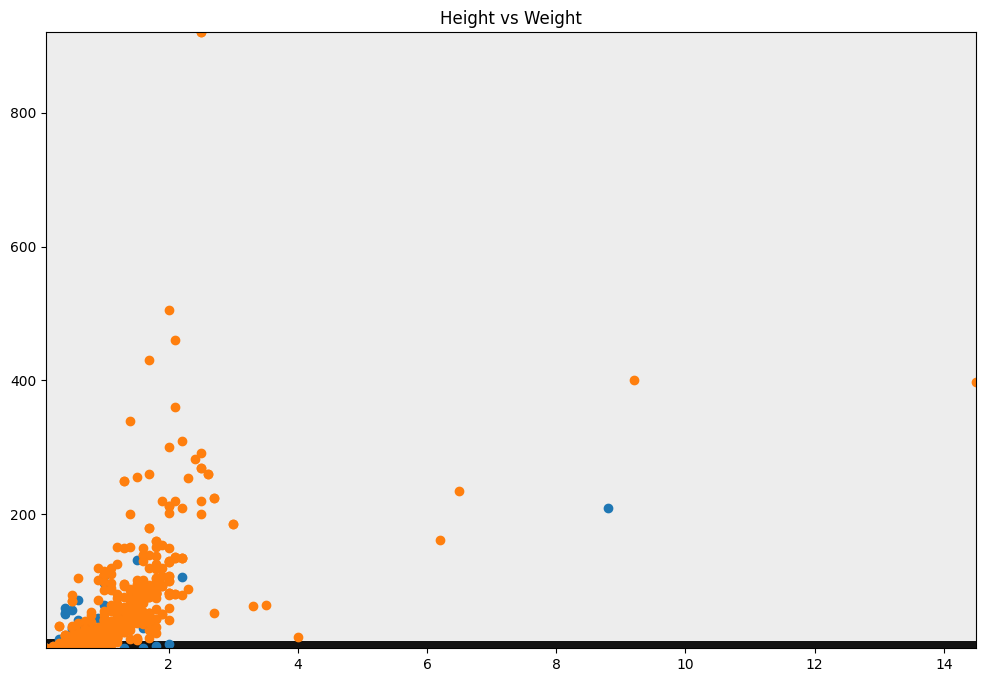

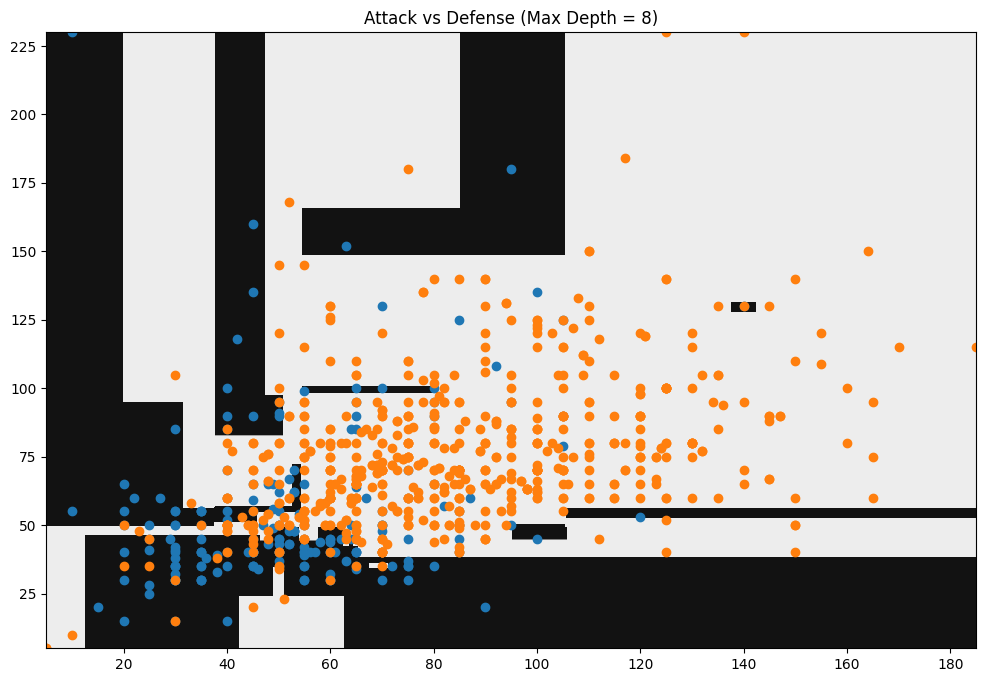

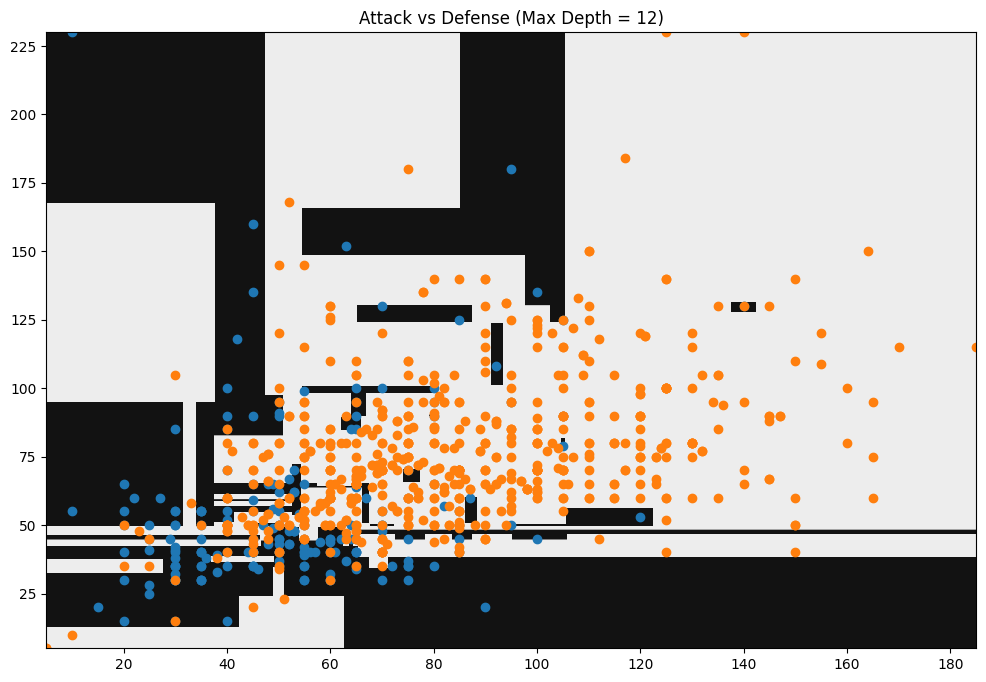

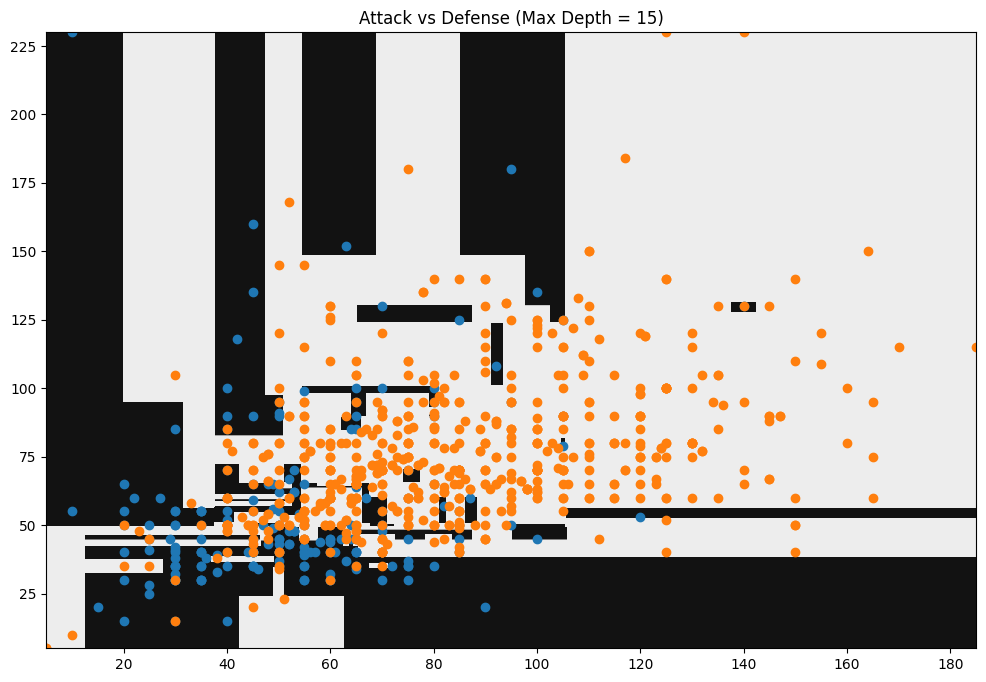

In [32]:
def accuracy_c(feat_x, feat_y, max_depth, title):
    x = df[[feat_x, feat_y]].values
    y = pd.to_numeric(df["hp"])
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=0)
    model = DecisionTreeClassifier(max_depth=max_depth)
    model.fit(x_train, y_train)
    
    # See if the model works
    y_pred = model.predict(x_test)
    num_incorrect = (y_test != y_pred).sum()
    total = y_test.shape[0]
    acc = (total - num_incorrect) / total * 100
    
    # Plot decision boundary
    plt.figure(figsize=(12, 8))
    plt.xlim([np.min(x[:, 0]), np.max(x[:, 0])])
    plt.ylim([np.min(x[:, 1]), np.max(x[:, 1])])
    plt.title(title)
    
    # Call plot_decision function
    plot_decision(x, y, model, 2)
    
    return print("Accuracy:", acc)

# Call the function with titles
accuracy_c("attack", "defense", 3, "Attack vs Defense")
accuracy_c("sp_attack", "sp_defense", 3, "Special Attack vs Special Defense")
accuracy_c("height_m", "weight_kg", 3, "Height vs Weight")
accuracy_c("attack", "defense", 8, "Attack vs Defense (Max Depth = 8)")
accuracy_c("attack", "defense", 12, "Attack vs Defense (Max Depth = 12)")
accuracy_c("attack", "defense", 15, "Attack vs Defense (Max Depth = 15)")


# Inspecting the tree


In [46]:
#Pick max_depth
max_depth = 3

In [47]:
feature1='attack'
feature2='defense'

x = df[[feature1,feature2]].values
y = pd.to_numeric(df["hp"])
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.5, random_state=0)
model = DecisionTreeClassifier(max_depth=max_depth)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

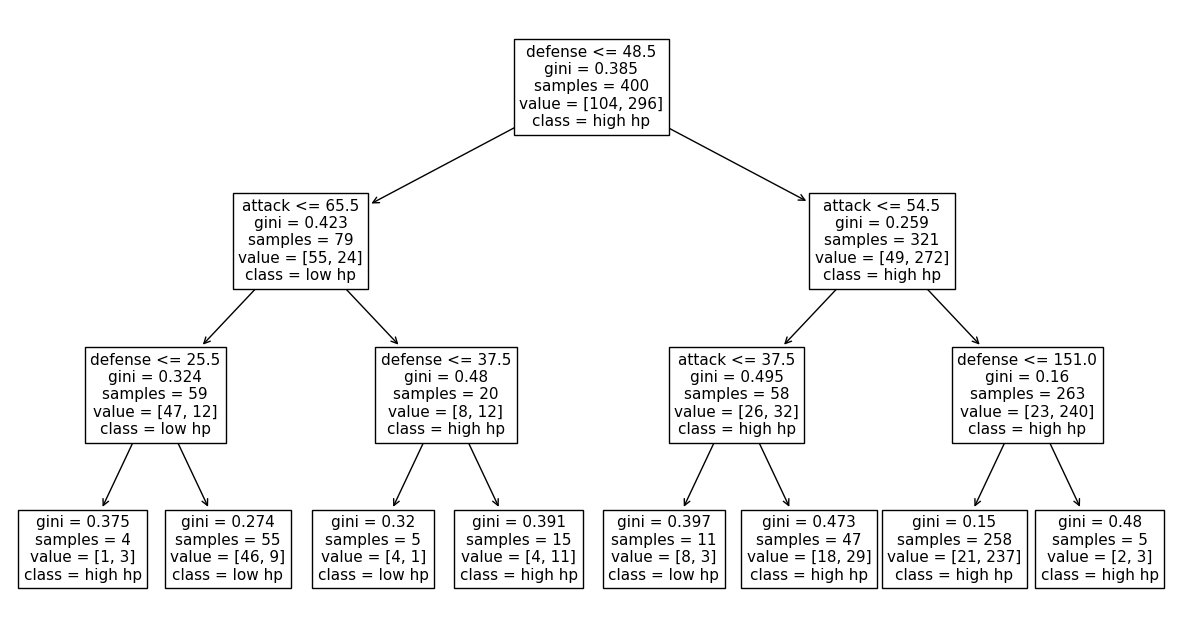

In [48]:
plt.figure(figsize=(15,8))
my_tree = plot_tree(model, feature_names=[feature1, feature2],fontsize=11,class_names = ["low hp","high hp"]) 

## Using more than 2 features 



In [49]:
#Pick max_depth
max_depth = 3

Accuracy: 80.41666666666667


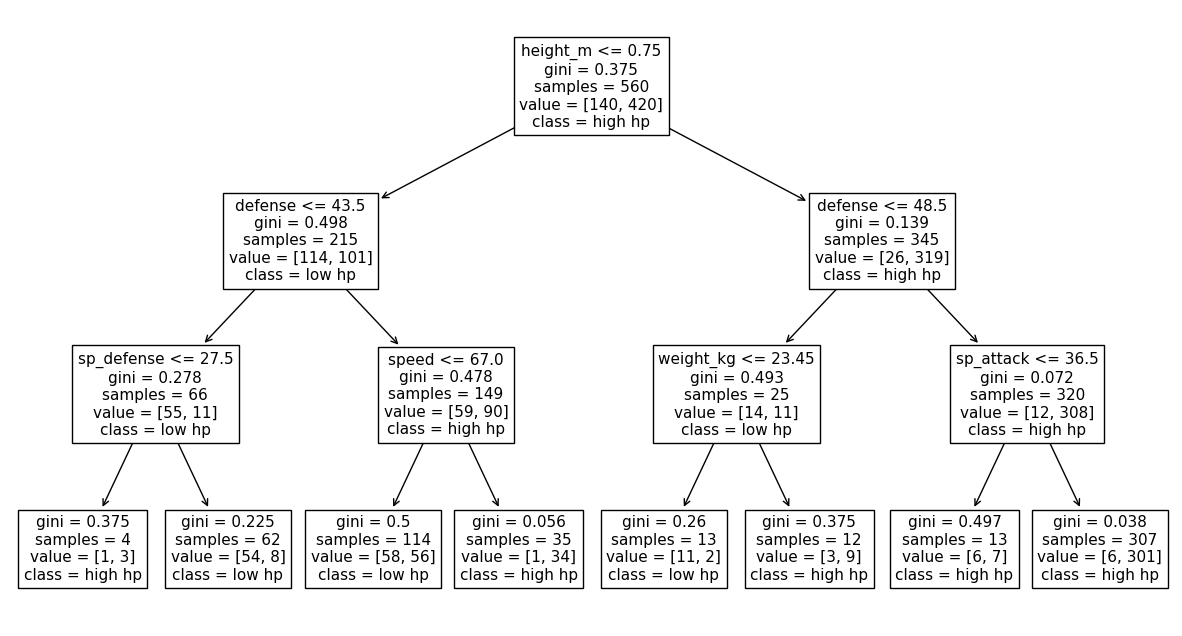

In [50]:
#Pick all features for input
x_labels = list(df.columns.values)
x_labels.remove("hp")
x = df[x_labels]

#Fit model
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)
model = DecisionTreeClassifier(max_depth=max_depth)
model.fit(x_train,y_train)

#See if the model works
y_pred = model.predict(x_test)
num_incorrect = (y_test != y_pred).sum()
total = y_test.shape[0]
acc = (total - num_incorrect) / total * 100

print("Accuracy:", acc)

plt.figure(figsize=(15,8))
my_plot = plot_tree(model, feature_names=x_labels,fontsize=11,class_names = ["low hp","high hp"]) 